# COVID-19 Data Analysis 
## Target Question Is there a relationship between spread of COVID-19 in a country and how happy people are living in that country ?

#### For this data analysis we will use 2 datasets. 
###### (I) COVID-19 dataset set published by John Hopkins University which consists       of data related to cumulative cases in different countries per day.
###### (II) World Happiness Report 2019 from the United Nations which consists of  happiness scores given by people living in different countries on various criteria

In [2]:
#importing required modules
import pandas as Pandas
import numpy as Numpy
import seaborn as Seaborn
import matplotlib.pyplot as Mpl

print(" << All modules were imported successfully >> ")

 << All modules were imported successfully >> 


In [3]:
#importing COVID-19 dataset 
covid19_dataset_csv = Pandas.read_csv("covid19_Confirmed_dataset.csv")
covid19_dataset_csv.head(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27
5,NaN,Antigua and Barbuda,17.0608,-61.7964,0,0,0,0,0,0,...,23,24,24,24,24,24,24,24,24,24
6,NaN,Argentina,-38.4161,-63.6167,0,0,0,0,0,0,...,3031,3144,3435,3607,3780,3892,4003,4127,4285,4428
7,NaN,Armenia,40.0691,45.0382,0,0,0,0,0,0,...,1401,1473,1523,1596,1677,1746,1808,1867,1932,2066
8,Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0,0,0,...,104,104,104,105,106,106,106,106,106,106
9,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,3,4,...,2969,2971,2976,2982,2994,3002,3004,3016,3016,3025


In [4]:
#checking dimensions of the table using shape property 
covid19_dataset_csv.shape

(266, 104)

In [5]:
#cleaning data by dropping unwanted columns in the dataframe
covid19_dataset_csv.drop(["Lat","Long"], axis=1, inplace=True)
covid19_dataset_csv.head(5)

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [6]:
# aggregating all countries and regions together
covid19_aggregated_dataset = covid19_dataset_csv.groupby("Country/Region").sum()
covid19_aggregated_dataset.head(10)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27
Antigua and Barbuda,0,0,0,0,0,0,0,0,0,0,...,23,24,24,24,24,24,24,24,24,24
Argentina,0,0,0,0,0,0,0,0,0,0,...,3031,3144,3435,3607,3780,3892,4003,4127,4285,4428
Armenia,0,0,0,0,0,0,0,0,0,0,...,1401,1473,1523,1596,1677,1746,1808,1867,1932,2066
Australia,0,0,0,0,4,5,5,6,9,9,...,6645,6652,6662,6677,6694,6714,6721,6744,6752,6766


In [8]:
covid19_aggregated_dataset.shape

(187, 100)

In [9]:
# viewing data related to a specific country
covid19_aggregated_dataset.loc["India"]

1/22/20        0
1/23/20        0
1/24/20        0
1/25/20        0
1/26/20        0
1/27/20        0
1/28/20        0
1/29/20        0
1/30/20        1
1/31/20        1
2/1/20         1
2/2/20         2
2/3/20         3
2/4/20         3
2/5/20         3
2/6/20         3
2/7/20         3
2/8/20         3
2/9/20         3
2/10/20        3
2/11/20        3
2/12/20        3
2/13/20        3
2/14/20        3
2/15/20        3
2/16/20        3
2/17/20        3
2/18/20        3
2/19/20        3
2/20/20        3
           ...  
4/1/20      1998
4/2/20      2543
4/3/20      2567
4/4/20      3082
4/5/20      3588
4/6/20      4778
4/7/20      5311
4/8/20      5916
4/9/20      6725
4/10/20     7598
4/11/20     8446
4/12/20     9205
4/13/20    10453
4/14/20    11487
4/15/20    12322
4/16/20    13430
4/17/20    14352
4/18/20    15722
4/19/20    17615
4/20/20    18539
4/21/20    20080
4/22/20    21370
4/23/20    23077
4/24/20    24530
4/25/20    26283
4/26/20    27890
4/27/20    29451
4/28/20    313

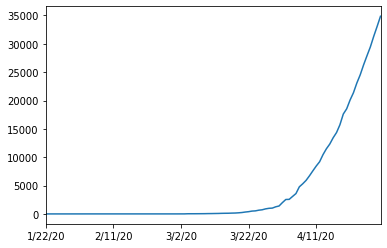

In [10]:
# viewing data related to a specific country by using matplotlib functions
covid19_aggregated_dataset.loc["India"].plot()

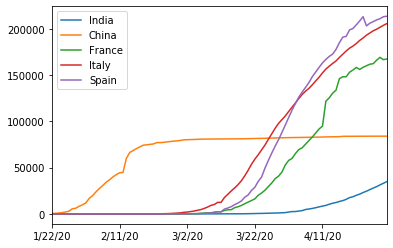

In [11]:
# Plotting comparative plots with other countries 
covid19_aggregated_dataset.loc["India"].plot()
covid19_aggregated_dataset.loc["China"].plot()
covid19_aggregated_dataset.loc["France"].plot()
covid19_aggregated_dataset.loc["Italy"].plot()
covid19_aggregated_dataset.loc["Spain"].plot()
Mpl.legend()

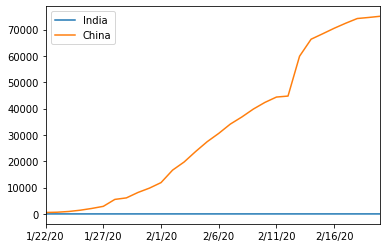

In [12]:
# Plotting for selected number for days
covid19_aggregated_dataset.loc["India"][:30].plot()
covid19_aggregated_dataset.loc["China"][:30].plot()
Mpl.legend()

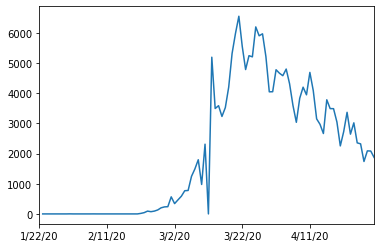

In [13]:
# Plotting curve for first derivative
covid19_aggregated_dataset.loc["Italy"].diff().plot()

In [14]:
# finding maximum infection rate 
covid19_aggregated_dataset.loc["Italy"].diff().max()

6557.0

In [15]:
covid19_aggregated_dataset.loc["China"].diff().max()

15136.0

In [16]:
covid19_aggregated_dataset.loc["India"].diff().max()

1893.0

In [17]:
# finding the maximum infection rate countrywise
countries = list(covid19_aggregated_dataset.index)
max_infection_rates = []
for country in countries:
    max_infection_rates.append(covid19_aggregated_dataset.loc[country].diff().max())
print(max_infection_rates)

[232.0, 34.0, 199.0, 43.0, 5.0, 6.0, 291.0, 134.0, 497.0, 1321.0, 105.0, 7.0, 301.0, 641.0, 12.0, 1485.0, 2454.0, 4.0, 19.0, 1.0, 104.0, 92.0, 7.0, 7502.0, 26.0, 137.0, 41.0, 21.0, 6.0, 45.0, 31.0, 203.0, 2778.0, 31.0, 21.0, 1138.0, 15136.0, 353.0, 1.0, 57.0, 81.0, 37.0, 113.0, 96.0, 63.0, 58.0, 381.0, 391.0, 99.0, 156.0, 5.0, 371.0, 11536.0, 269.0, 32.0, 130.0, 7.0, 134.0, 20.0, 9.0, 5.0, 267.0, 26849.0, 38.0, 5.0, 42.0, 6933.0, 403.0, 156.0, 6.0, 68.0, 167.0, 132.0, 12.0, 10.0, 3.0, 72.0, 210.0, 99.0, 1893.0, 436.0, 3186.0, 91.0, 1515.0, 1131.0, 6557.0, 52.0, 1161.0, 40.0, 264.0, 29.0, 851.0, 289.0, 300.0, 69.0, 3.0, 48.0, 61.0, 17.0, 13.0, 21.0, 90.0, 234.0, 7.0, 14.0, 10.0, 235.0, 190.0, 58.0, 52.0, 2.0, 41.0, 1425.0, 222.0, 12.0, 13.0, 30.0, 281.0, 19.0, 3.0, 14.0, 1346.0, 89.0, 2.0, 69.0, 208.0, 107.0, 386.0, 144.0, 1292.0, 357.0, 5.0, 27.0, 3683.0, 538.0, 545.0, 1516.0, 957.0, 523.0, 7099.0, 22.0, 5.0, 6.0, 4.0, 54.0, 6.0, 1351.0, 87.0, 2379.0, 2.0, 20.0, 1426.0, 114.0, 70.0, 73

In [18]:
# Adding a new column to the dataset
covid19_aggregated_dataset["max_infection_rate"] = max_infection_rates
covid19_aggregated_dataset.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,max_infection_rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1176,1279,1351,1463,1531,1703,1828,1939,2171,232.0
Albania,0,0,0,0,0,0,0,0,0,0,...,634,663,678,712,726,736,750,766,773,34.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,2910,3007,3127,3256,3382,3517,3649,3848,4006,199.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,723,723,731,738,738,743,743,743,745,43.0
Angola,0,0,0,0,0,0,0,0,0,0,...,25,25,25,25,26,27,27,27,27,5.0


In [19]:
# Creating a new Pandas dataframe containing only countries and max_infection_rate
covid19_data = Pandas.DataFrame(covid19_aggregated_dataset["max_infection_rate"])
covid19_data.head()

,max_infection_rate
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0


#### Our COVID-19 data is ready

In [20]:
# Importing and reading World Happiness index
happiness_report_csv = Pandas.read_csv("worldwide_happiness_report.csv")
happiness_report_csv.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [22]:
# Cleaning data (dropping useless columns)
happiness_report_csv.drop(["Overall rank","Score","Generosity","Perceptions of corruption"], axis=1, inplace=True)
happiness_report_csv.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557


In [23]:
# setting country name as index ( This makes things more feasible)
happiness_report_csv.set_index("Country or region", inplace=True)
happiness_report_csv.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


In [26]:
# Now its time to join the datasets.
covid19_data.head()

,max_infection_rate
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0


In [27]:
covid19_data.shape

(187, 1)

In [28]:
happiness_report_csv.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


In [29]:
happiness_report_csv.shape

(156, 4)

In [30]:
# We need to perform an inner join in this case as the number of contries do not match.
maindata = covid19_data.join(happiness_report_csv,how="inner")
maindata.head()

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232.0,0.350,0.517,0.361,0.000
Albania,34.0,0.947,0.848,0.874,0.383
Algeria,199.0,1.002,1.160,0.785,0.086
Argentina,291.0,1.092,1.432,0.881,0.471
Armenia,134.0,0.850,1.055,0.815,0.283


In [31]:
# correlation matrix 
maindata.corr()

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
max_infection_rate,1.000000,0.250118,0.191958,0.289263,0.078196
GDP per capita,0.250118,1.000000,0.759468,0.863062,0.394603
Social support,0.191958,0.759468,1.000000,0.765286,0.456246
Healthy life expectancy,0.289263,0.863062,0.765286,1.000000,0.427892
Freedom to make life choices,0.078196,0.394603,0.456246,0.427892,1.000000


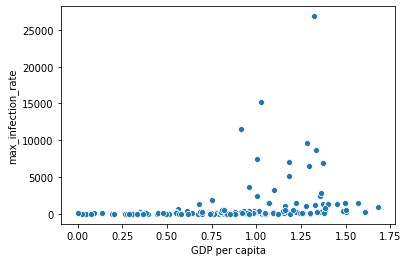

In [33]:
# We get a very interesting result from the above matrix .
# There is positive correlation between all the parameters.
# Now we need to visualize the data.
xAxis = maindata["GDP per capita"]
yAxis = maindata["max_infection_rate"]
Seaborn.scatterplot(xAxis,yAxis)

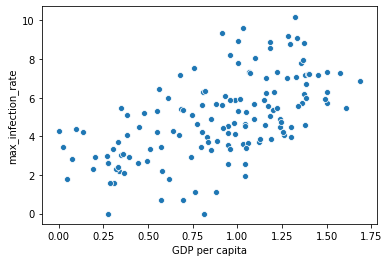

In [34]:
Seaborn.scatterplot(xAxis, Numpy.log(yAxis))

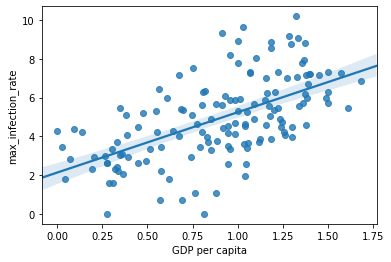

In [35]:
Seaborn.regplot(xAxis, Numpy.log(yAxis))

## Social Support vs max infection rate

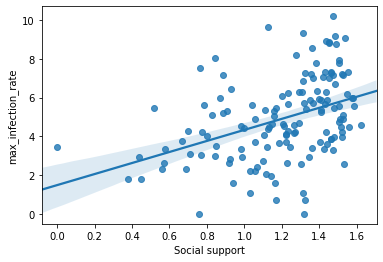

In [37]:
xAxis = maindata["Social support"]
yAxis = maindata["max_infection_rate"]
Seaborn.regplot(xAxis, Numpy.log(yAxis))

## Freedom to make choices vs max infection rate

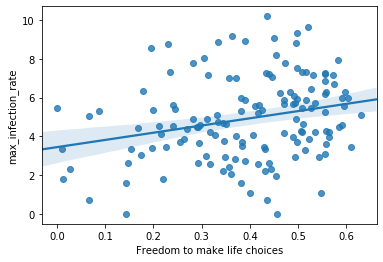

In [39]:
xAxis = maindata["Freedom to make life choices"]
yAxis = maindata["max_infection_rate"]
Seaborn.regplot(xAxis, Numpy.log(yAxis))

## Healthy life expectancy vs max infection rate

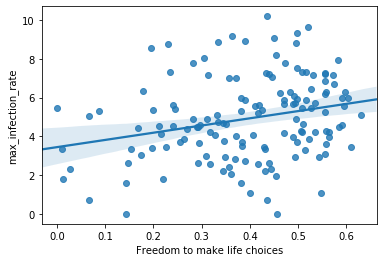

In [40]:
xAxis = maindata["Freedom to make life choices"]
yAxis = maindata["max_infection_rate"]
Seaborn.regplot(xAxis, Numpy.log(yAxis))

### We found that people living in more happy countries or developed countries are more prone to getting infected to COVID-19 than less happy ones.